<a href="https://colab.research.google.com/github/Dubeysiddhika/Future-sales-prediction/blob/main/Future_sales_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-4-3819474595.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
/tmp/ipython-input-4-3819474595.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

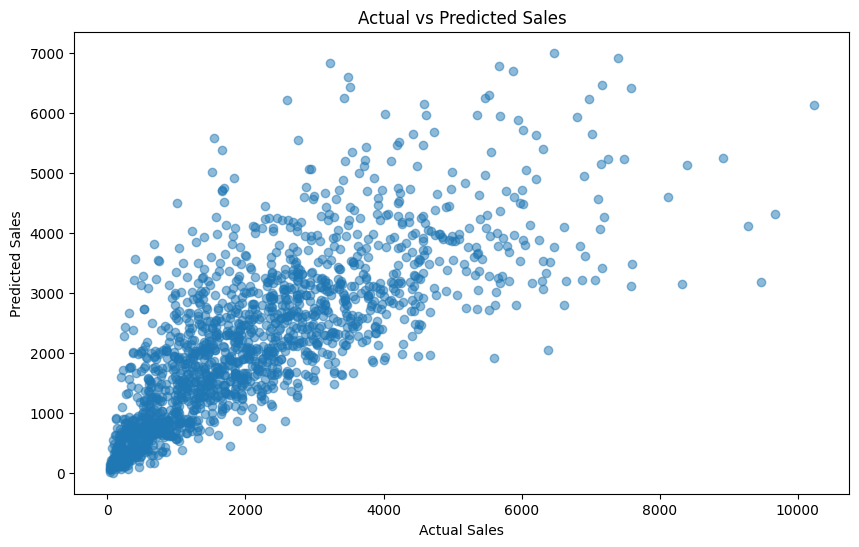

Predicted Sales for next 3 months (sampled items):
Month 1: 2915.75
Month 2: 504.67999267578125
Month 3: 571.1300048828125


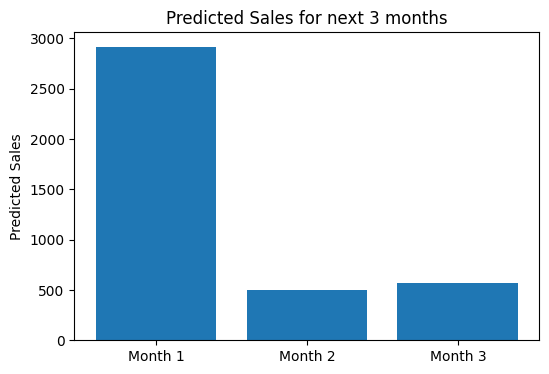

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("Train (1).csv")

# Fill missing values
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

# Encode categorical features
label_encoders = {}
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
            'Outlet_Location_Type', 'Outlet_Type']

for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature matrix and target
X = data.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
y = data['Item_Outlet_Sales']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# ---- FUTURE PREDICTION ----
# Simulate 3-month future data by repeating typical values
future_data = X.sample(3).copy()
future_data['Outlet_Establishment_Year'] += 1  # simulate time shift

future_pred = model.predict(future_data)

# Print predicted values
print("Predicted Sales for next 3 months (sampled items):")
for i, val in enumerate(future_pred, 1):
    print(f"Month {i}: {round(val, 2)}")

# Plot predicted sales as a bar graph
plt.figure(figsize=(6, 4))
months = [f"Month {i+1}" for i in range(len(future_pred))]
plt.bar(months, future_pred)
plt.ylabel("Predicted Sales")
plt.title("Predicted Sales for next 3 months")
plt.show()